In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

In [74]:
MAIN_DIR = "/home/usuario/disco1/proyectos/2023-resting-state-estados-fMRI_conn"
connectivity = sio.loadmat(f"{MAIN_DIR}/results/connectivity/connectivity.mat")["C_net"]

diff_transicion = connectivity[:, 1, :, :]-connectivity[:, 0, :, :]
diff_alteracion = connectivity[:, 2, :, :]-connectivity[:, 0, :, :]
diff_recuperacion = connectivity[:, 3, :, :]-connectivity[:, 0, :, :]

n_sessions = diff_transicion.shape[0]

network_names = ["UNC", "SSH", "SSM", "COTC", "AUD", "DMN", "MEM", "VA", "VIS", "FPC", "SA", "SUB", "CER", "DA", "OTRO"]

In [75]:
diff_transicion.shape

(18, 15, 15)

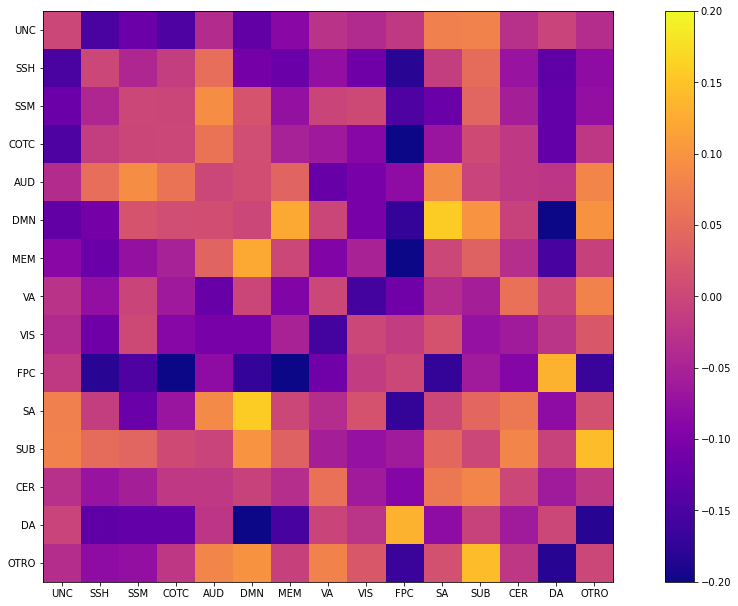

In [76]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.imshow(np.mean(diff_transicion, axis=0), interpolation='none', vmin=-0.2, vmax=0.2)
plt.set_cmap('plasma')
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(network_names)
ax.set_yticklabels(network_names)
plt.colorbar()

plt.savefig(f"{MAIN_DIR}/results/connectivity/figures/diff_transicion.png")

### Mean connectivity

In [8]:
mean_transicion = np.mean(np.mean(diff_transicion, axis=1), axis=0)
mean_alteracion = np.mean(np.mean(diff_alteracion, axis=1), axis=0)
mean_recuperacion = np.mean(np.mean(diff_recuperacion, axis=1), axis=0)

y_min = -0.14
y_max = 0.14

stderr_transicion = np.std(np.mean(diff_transicion, axis=1), axis=0)/np.sqrt(n_sessions)
stderr_alteracion = np.std(np.mean(diff_alteracion, axis=1), axis=0)/np.sqrt(n_sessions)
stderr_recuperacion = np.std(np.mean(diff_recuperacion, axis=1), axis=0)/np.sqrt(n_sessions)

x_range = np.arange(1, 15)

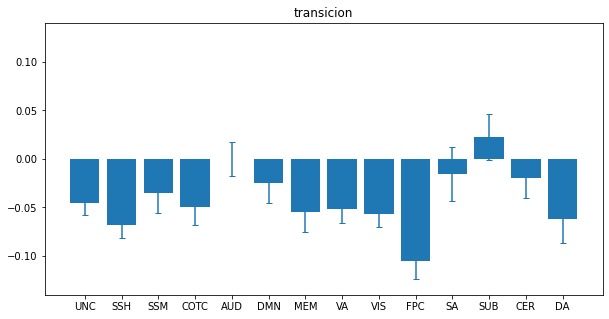

In [9]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.bar(x_range, mean_transicion)
plt.errorbar(x_range, mean_transicion, stderr_transicion, linestyle="None", capsize=3)
ax = plt.gca()
ax.set_xticks(x_range)
ax.set_xticklabels(network_names)
ax.set_ylim(y_min, y_max)
plt.title("transicion")
plt.savefig(f"{MAIN_DIR}/results/connectivity/figures/diff_transicion_por_red.png")

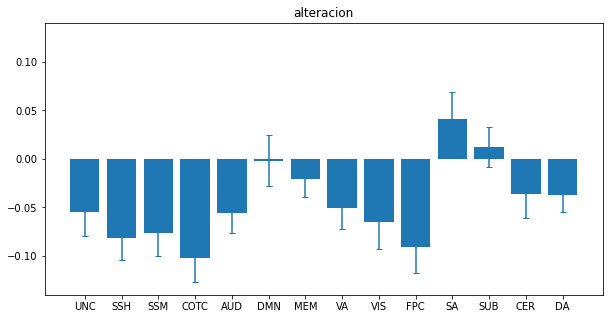

In [10]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.bar(np.arange(1,15), mean_alteracion)
plt.errorbar(x_range, mean_alteracion, stderr_alteracion, linestyle="None", capsize=3)
ax = plt.gca()
ax.set_xticks(np.arange(1,15))
ax.set_xticklabels(network_names)
ax.set_ylim(y_min, y_max)
plt.title("alteracion")
plt.savefig(f"{MAIN_DIR}/results/connectivity/figures/diff_alteracion_por_red.png")

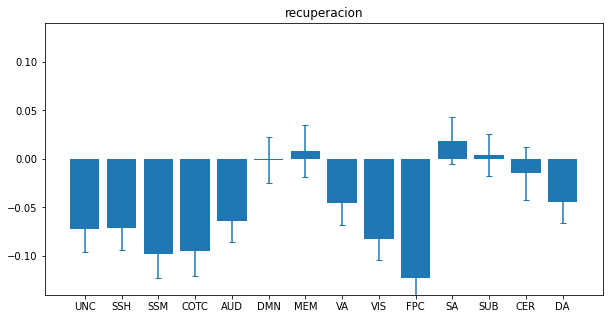

In [11]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.bar(x_range, mean_recuperacion)
plt.errorbar(x_range, mean_recuperacion, stderr_recuperacion, linestyle="None", capsize=3)
ax = plt.gca()
ax.set_xticks(x_range)
ax.set_xticklabels(network_names)
ax.set_ylim(y_min, y_max)
plt.title("recuperacion")
plt.savefig(f"{MAIN_DIR}/results/connectivity/figures/diff_recuperacion_por_red.png")

### Differences between conditions

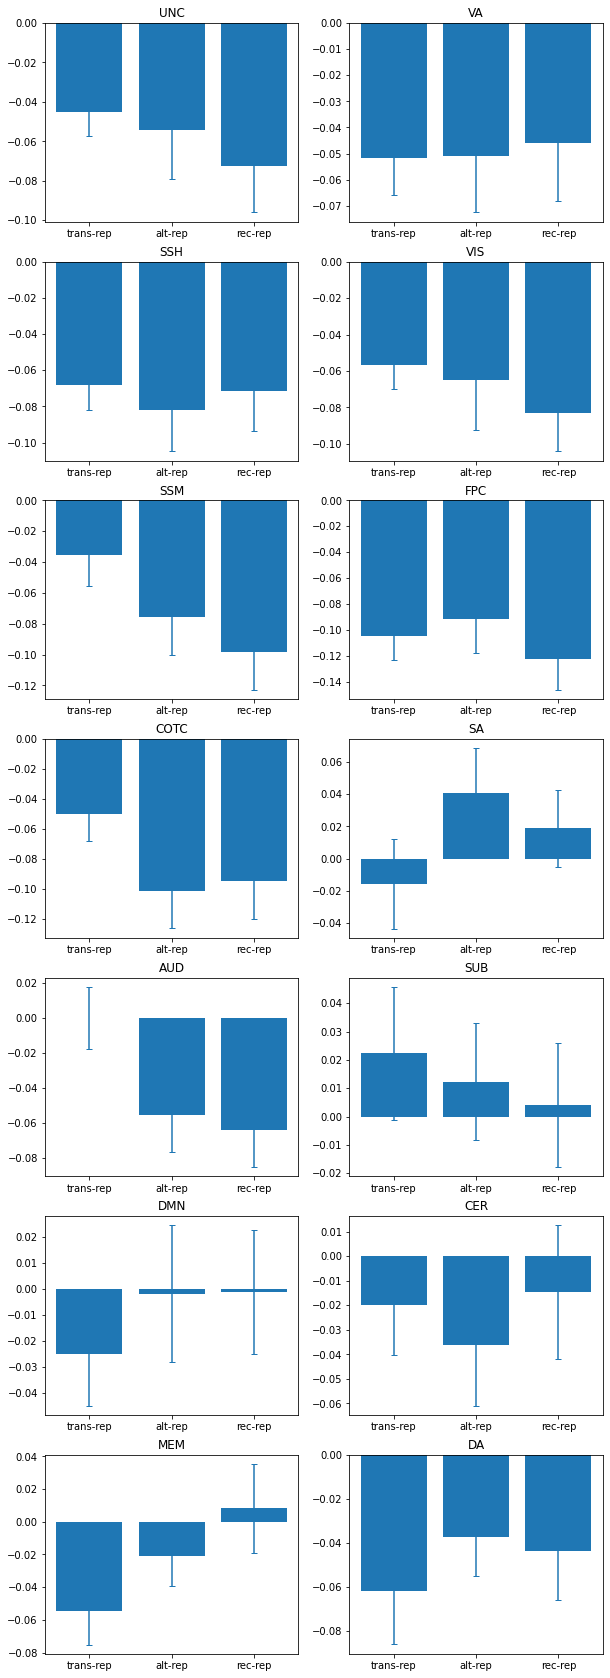

In [12]:
fig, axs = plt.subplots(7,2)
fig.set_size_inches(10, 30)
for i in range(14):
    x_index = i%7
    y_index = int(i/7)
    axs[x_index, y_index].bar([1,2,3], [mean_transicion[i], mean_alteracion[i], mean_recuperacion[i]])
    axs[x_index, y_index].errorbar(
        [1,2,3], 
        [mean_transicion[i], mean_alteracion[i], mean_recuperacion[i]],
        [stderr_transicion[i], stderr_alteracion[i], stderr_recuperacion[i]],
        linestyle="None",
        capsize=3
    )
    axs[x_index, y_index].set_xticks([1,2,3])
    axs[x_index, y_index].set_xticklabels(["trans-rep","alt-rep","rec-rep"])
    axs[x_index, y_index].set_title(network_names[i])

### Intra and inter network conn

In [13]:
def intra_inter_mean_stderr(intra_single_value, inter_single_value):
    intra_single_value = np.squeeze(intra_single_value)
    inter_single_value = np.squeeze(inter_single_value)
    
    mean_intra = np.mean(intra_single_value, axis=0)
    mean_inter = np.mean(inter_single_value, axis=0)

    stderr_intra = np.std(intra_single_value, axis=0)/np.sqrt(n_sessions)
    stderr_inter = np.std(inter_single_value, axis=0)/np.sqrt(n_sessions)
    
    return {"intra": {"mean": mean_intra, "stderr": stderr_intra}, "inter": {"mean": mean_inter, "stderr": stderr_inter}}

In [14]:
ID_DMN = 6-1
ID_SA = 11-1
ID_VIS = 9-1
ID_FPT = 10-1

#dmn
intra_conn = sio.loadmat(f"{MAIN_DIR}/results/connectivity/intra_connectivity.mat")["C_intra"]
inter_conn = sio.loadmat(f"{MAIN_DIR}/results/connectivity/inter_connectivity.mat")["C_inter"]
mean_stderr_dmn = intra_inter_mean_stderr(intra_conn[:,:,ID_DMN], inter_conn[:,:,ID_DMN])

#salience
intra_conn_sa = sio.loadmat(f"{MAIN_DIR}/results/connectivity/intra_connectivity_sa.mat")["C_intra"]
inter_conn_sa = sio.loadmat(f"{MAIN_DIR}/results/connectivity/inter_connectivity_sa.mat")["C_inter"]
mean_stderr_sa = intra_inter_mean_stderr(intra_conn[:,:,ID_SA], inter_conn[:,:,ID_SA])

#visual
intra_conn_vis = sio.loadmat(f"{MAIN_DIR}/results/connectivity/intra_connectivity_vis.mat")["C_intra"]
inter_conn_vis = sio.loadmat(f"{MAIN_DIR}/results/connectivity/inter_connectivity_vis.mat")["C_inter"]
mean_stderr_vis = intra_inter_mean_stderr(intra_conn[:,:,ID_VIS], inter_conn[:,:,ID_VIS])

#fronto parietal
intra_conn_fpt = sio.loadmat(f"{MAIN_DIR}/results/connectivity/intra_connectivity_fpt.mat")["C_intra"]
inter_conn_fpt = sio.loadmat(f"{MAIN_DIR}/results/connectivity/inter_connectivity_fpt.mat")["C_inter"]
mean_stderr_fpt = intra_inter_mean_stderr(intra_conn[:,:,ID_FPT], inter_conn[:,:,ID_FPT])

[Text(1, 0, 'reposo'),
 Text(2, 0, 'transicion'),
 Text(3, 0, 'alteracion'),
 Text(4, 0, 'recuperacion')]

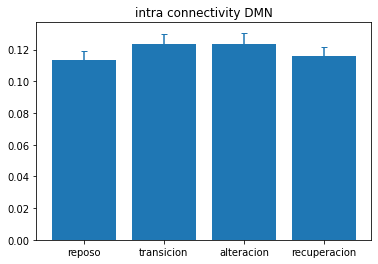

In [15]:
plt.bar([1,2,3,4], mean_stderr_dmn["intra"]["mean"])
plt.errorbar([1,2,3,4], mean_stderr_dmn["intra"]["mean"], mean_stderr_dmn["intra"]["stderr"], linestyle="None", capsize=3)
plt.title("intra connectivity DMN")
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["reposo", "transicion", "alteracion", "recuperacion"])

[Text(1, 0, 'reposo'),
 Text(2, 0, 'transicion'),
 Text(3, 0, 'alteracion'),
 Text(4, 0, 'recuperacion')]

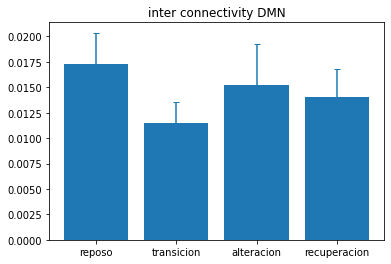

In [16]:
plt.bar([1,2,3,4], mean_stderr_dmn["inter"]["mean"])
plt.errorbar([1,2,3,4], mean_stderr_dmn["inter"]["mean"], mean_stderr_dmn["inter"]["stderr"], linestyle="None", capsize=3)
plt.title("inter connectivity DMN")
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["reposo", "transicion", "alteracion", "recuperacion"])

### intra connectivity salience

[Text(1, 0, 'reposo'),
 Text(2, 0, 'transicion'),
 Text(3, 0, 'alteracion'),
 Text(4, 0, 'recuperacion')]

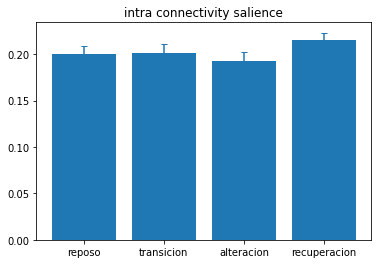

In [17]:
plt.bar([1,2,3,4], mean_stderr_sa["intra"]["mean"])
plt.errorbar([1,2,3,4], mean_stderr_sa["intra"]["mean"], mean_stderr_sa["intra"]["stderr"], linestyle="None", capsize=3)
plt.title("intra connectivity salience")
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["reposo", "transicion", "alteracion", "recuperacion"])

[Text(1, 0, 'reposo'),
 Text(2, 0, 'transicion'),
 Text(3, 0, 'alteracion'),
 Text(4, 0, 'recuperacion')]

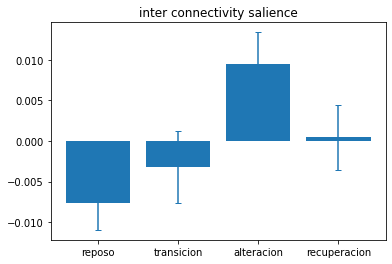

In [18]:
plt.bar([1,2,3,4], mean_stderr_sa["inter"]["mean"])
plt.errorbar([1,2,3,4], mean_stderr_sa["inter"]["mean"], mean_stderr_sa["inter"]["stderr"], linestyle="None", capsize=3)
plt.title("inter connectivity salience")
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["reposo", "transicion", "alteracion", "recuperacion"])

### intra inter connectivity visual

[Text(1, 0, 'reposo'),
 Text(2, 0, 'transicion'),
 Text(3, 0, 'alteracion'),
 Text(4, 0, 'recuperacion')]

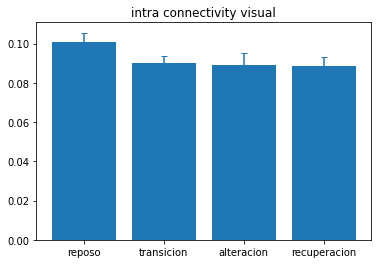

In [19]:
plt.bar([1,2,3,4], mean_stderr_vis["intra"]["mean"])
plt.errorbar([1,2,3,4], mean_stderr_vis["intra"]["mean"], mean_stderr_vis["intra"]["stderr"], linestyle="None", capsize=3)
plt.title("intra connectivity visual")
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["reposo", "transicion", "alteracion", "recuperacion"])

[Text(1, 0, 'reposo'),
 Text(2, 0, 'transicion'),
 Text(3, 0, 'alteracion'),
 Text(4, 0, 'recuperacion')]

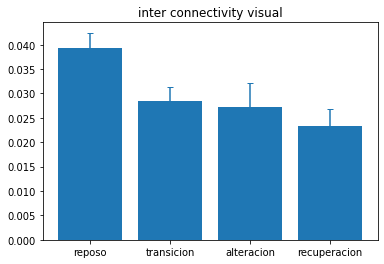

In [20]:
plt.bar([1,2,3,4], mean_stderr_vis["inter"]["mean"])
plt.errorbar([1,2,3,4], mean_stderr_vis["inter"]["mean"], mean_stderr_vis["inter"]["stderr"], linestyle="None", capsize=3)
plt.title("inter connectivity visual")
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["reposo", "transicion", "alteracion", "recuperacion"])

### intra inter connectivity fronto parietal

[Text(1, 0, 'reposo'),
 Text(2, 0, 'transicion'),
 Text(3, 0, 'alteracion'),
 Text(4, 0, 'recuperacion')]

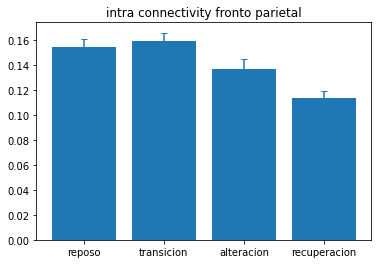

In [21]:
plt.bar([1,2,3,4], mean_stderr_fpt["intra"]["mean"])
plt.errorbar([1,2,3,4], mean_stderr_fpt["intra"]["mean"], mean_stderr_fpt["intra"]["stderr"], linestyle="None", capsize=3)
plt.title("intra connectivity fronto parietal")
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["reposo", "transicion", "alteracion", "recuperacion"])

[Text(1, 0, 'reposo'),
 Text(2, 0, 'transicion'),
 Text(3, 0, 'alteracion'),
 Text(4, 0, 'recuperacion')]

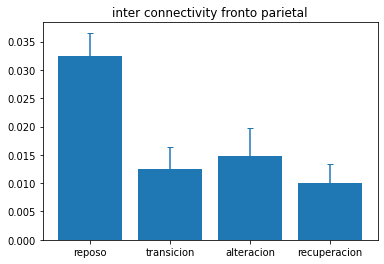

In [22]:
plt.bar([1,2,3,4], mean_stderr_fpt["inter"]["mean"])
plt.errorbar([1,2,3,4], mean_stderr_fpt["inter"]["mean"], mean_stderr_fpt["inter"]["stderr"], linestyle="None", capsize=3)
plt.title("inter connectivity fronto parietal")
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["reposo", "transicion", "alteracion", "recuperacion"])

### inter intra connectivity all networks

In [23]:
inter_conn_per_sub_per_cond = np.mean(inter_conn, axis=2)
inter_conn_per_cond_mean = np.mean(inter_conn_per_sub_per_cond, axis=0)
inter_conn_per_cond_stderr = np.std(inter_conn_per_sub_per_cond, axis=0)/np.sqrt(n_sessions)

intra_conn_per_sub_per_cond = np.mean(intra_conn, axis=2)
intra_conn_per_cond_mean = np.mean(intra_conn_per_sub_per_cond, axis=0)
intra_conn_per_cond_stderr = np.std(intra_conn_per_sub_per_cond, axis=0)/np.sqrt(n_sessions)

[Text(1, 0, 'reposo'),
 Text(2, 0, 'transicion'),
 Text(3, 0, 'alteracion'),
 Text(4, 0, 'recuperacion')]

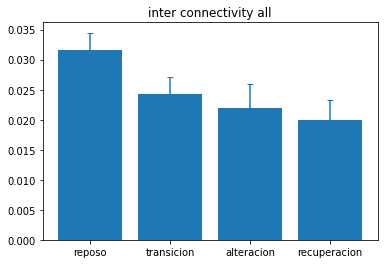

In [24]:
plt.bar([1,2,3,4], inter_conn_per_cond_mean)
plt.errorbar([1,2,3,4], inter_conn_per_cond_mean, inter_conn_per_cond_stderr, linestyle="None", capsize=3)
plt.title("inter connectivity all")
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["reposo", "transicion", "alteracion", "recuperacion"])

(0.2, 0.3)

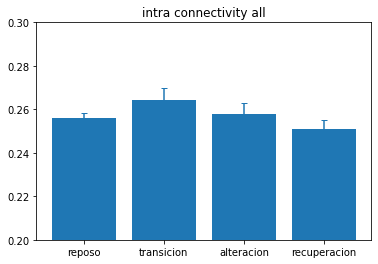

In [26]:
plt.bar([1,2,3,4], intra_conn_per_cond_mean)
plt.errorbar([1,2,3,4], intra_conn_per_cond_mean, intra_conn_per_cond_stderr, linestyle="None", capsize=3)
plt.title("intra connectivity all")
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["reposo", "transicion", "alteracion", "recuperacion"])
ax.set_ylim([0.2, 0.3])

### todas las redes

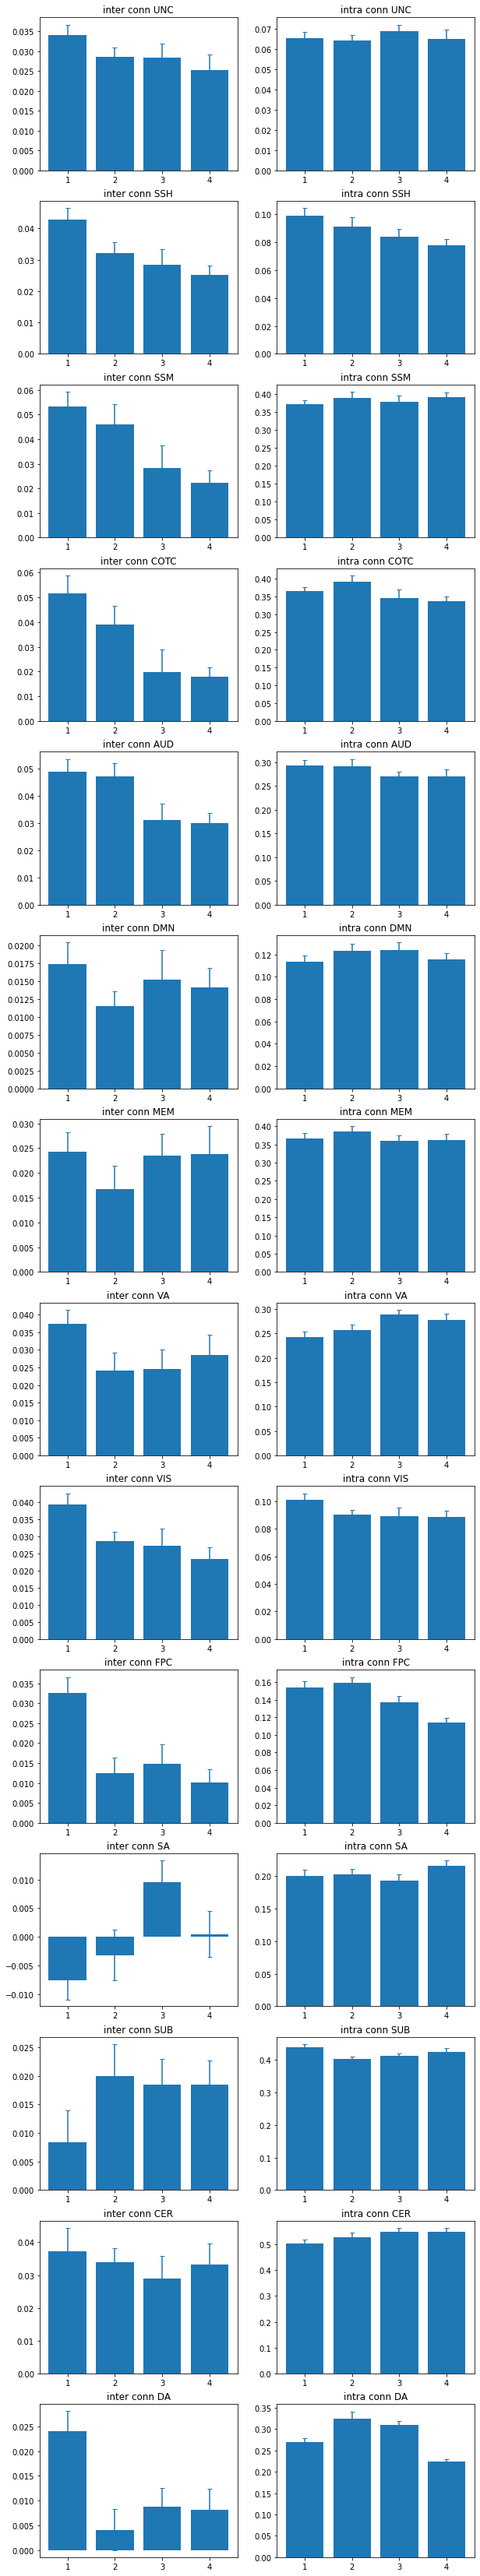

In [27]:
fig, axs = plt.subplots(14,2)
fig.set_size_inches(10, 60)
for (i, network) in enumerate(network_names):
    inter_mean = np.mean(inter_conn[:,:,i], axis=0)
    inter_stderr = np.std(inter_conn[:,:,i], axis=0)/np.sqrt(n_sessions)
    intra_mean = np.mean(intra_conn[:,:,i], axis=0)
    intra_stderr = np.std(intra_conn[:,:,i], axis=0)/np.sqrt(n_sessions)
    
    axs[i, 0].bar([1,2,3,4], inter_mean)
    axs[i, 0].errorbar([1,2,3,4], inter_mean, inter_stderr, linestyle="None", capsize=3)
    axs[i, 0].set_title(f"inter conn {network}")
    
    axs[i, 1].bar([1,2,3,4], intra_mean)
    axs[i, 1].errorbar([1,2,3,4], intra_mean, intra_stderr, linestyle="None", capsize=3)
    axs[i, 1].set_title(f"intra conn {network}")

plt.savefig(f"{MAIN_DIR}/results/connectivity/figures/conn_intra_inter_all_networks.png")

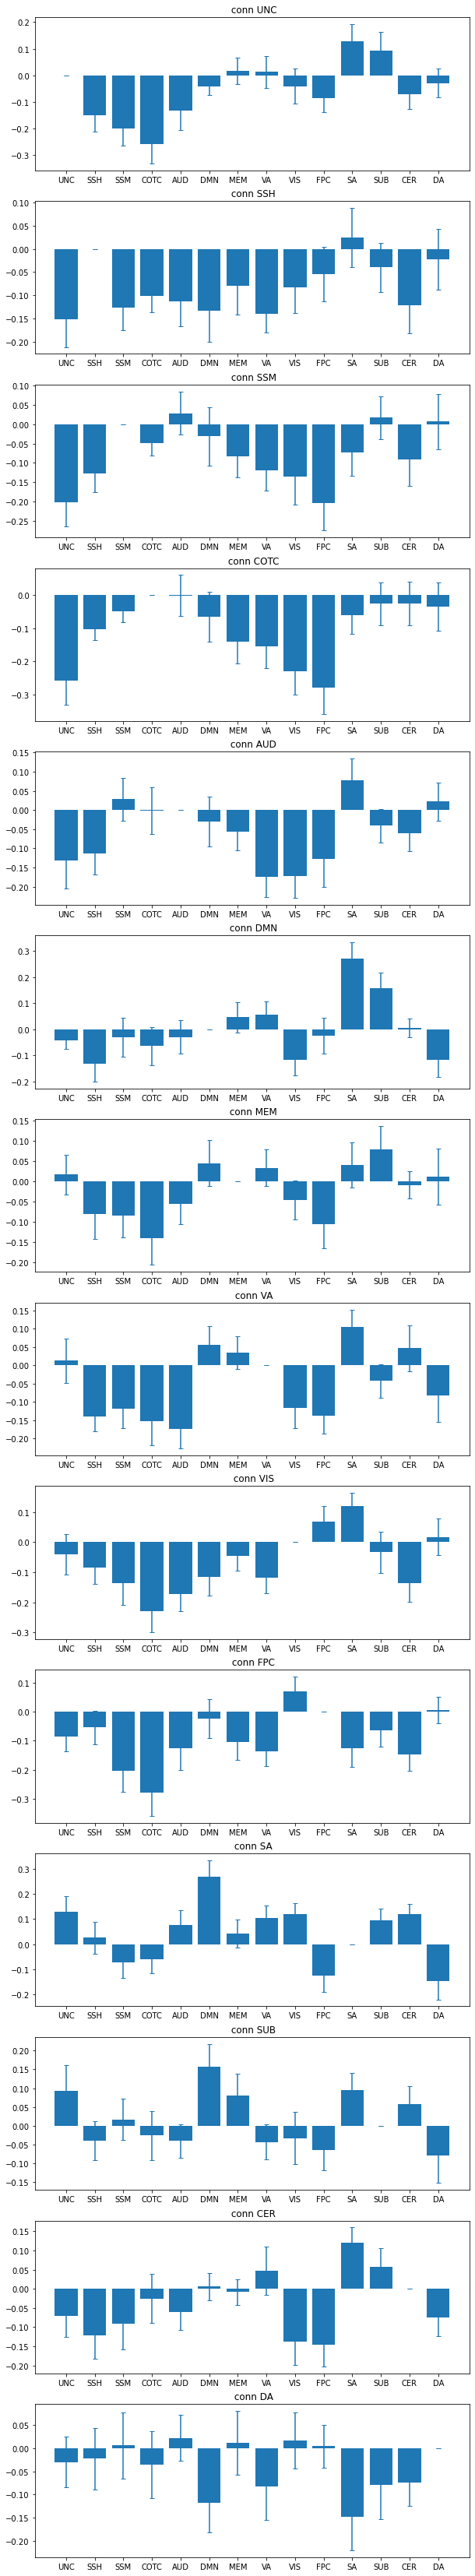

In [28]:
#C = np.mean(diff_transicion,axis = 0)
#S = np.std(diff_transicion,axis = 0) / np.sqrt(n_sessions)
C = np.mean(diff_alteracion,axis = 0)
S = np.std(diff_alteracion,axis = 0) / np.sqrt(n_sessions)


fig, axs = plt.subplots(14,1)
fig.set_size_inches(10, 60)
for (i, network) in enumerate(network_names):
    axs[i].bar(list(range(14)), C[i,:])
    axs[i].errorbar(list(range(14)),  C[i,:], S[i,:], linestyle="None", capsize=3)
    axs[i].set_title(f" conn {network}")
    axs[i].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    axs[i].set_xticklabels(network_names)
    

## conectividad en regiones

In [68]:
connectivity_regions = sio.loadmat(f"{MAIN_DIR}/results/connectivity/connectivity_264.mat")["C"]
connectivity_per_cond = np.mean(connectivity_regions, axis=0)
dif_transicion = connectivity_per_cond[1,:,:]-connectivity_per_cond[0,:,:]
dif_alteracion = connectivity_per_cond[2,:,:]-connectivity_per_cond[0,:,:]

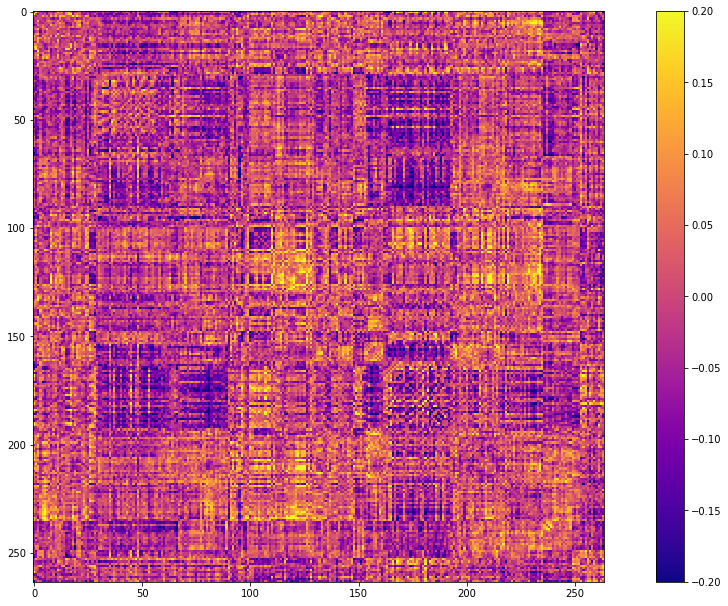

In [69]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.imshow(dif_alteracion, interpolation='none', vmin=-0.2, vmax=0.2)
plt.set_cmap('plasma')
plt.colorbar()

In [87]:
func_networks_list = np.loadtxt(f"{MAIN_DIR}/scripts/func_networks/masks/rois264_identitypruebaborrar.txt", dtype=int)
rois_sa = func_networks_list == 15
rois_dmn = func_networks_list == 6
rois_considered = rois_sa | rois_dmn

dif_transicion_masked = np.copy(dif_transicion)
dif_transicion_masked[~rois_considered,:] = -1
dif_transicion_masked[:,~rois_considered] = -1

dif_alteracion_masked = np.copy(dif_alteracion)
dif_alteracion_masked[~rois_considered,:] = -1
dif_alteracion_masked[:,~rois_considered] = -1

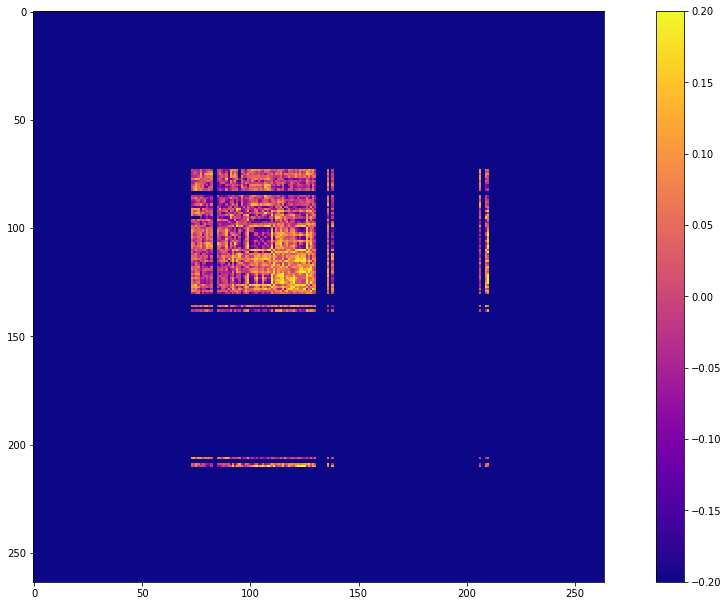

In [88]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.imshow(dif_alteracion_masked, interpolation='none', vmin=-0.2, vmax=0.2)
plt.set_cmap('plasma')
plt.colorbar()
plt.show()

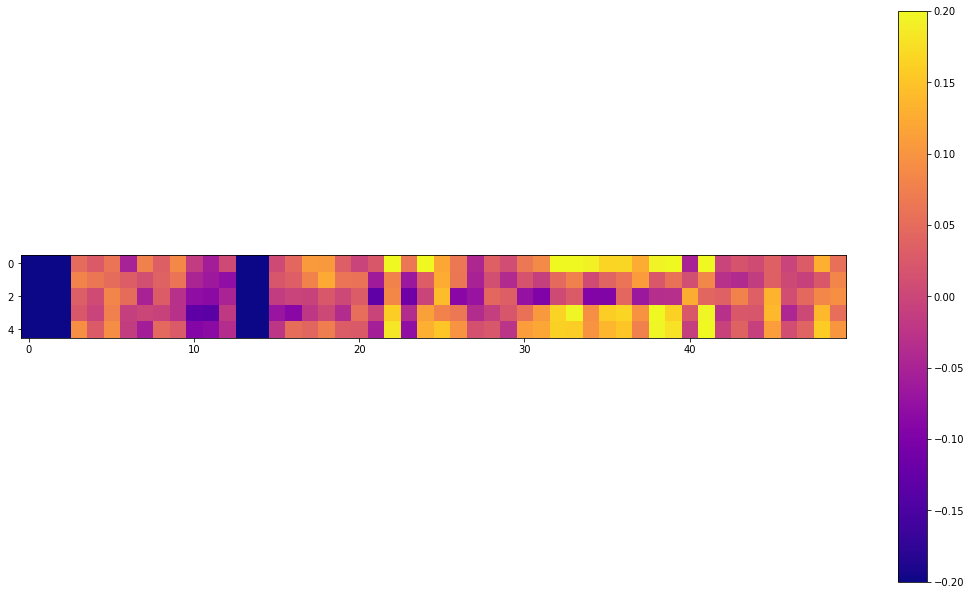

In [72]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.imshow(dif_alteracion_masked[207:212, 70:120], interpolation='none', vmin=-0.2, vmax=0.2)
plt.set_cmap('plasma')
plt.colorbar()

In [73]:
sio.savemat("conectividad_mascara_alteracion.mat", {"c": dif_alteracion_masked})